<a href="https://colab.research.google.com/github/djglab/Foxk1_manuscript/blob/main/notebooks/Figure_4ef_RNAseq_Foxk1_D10_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this notebook is to see compare the Control and Foxk1 Null at D10 and see the genes upregulated and downregulated at D10 and chromatin landscape of Transcritpion Factors

In [ ]:
start_time0 <- Sys.time()

# Downloading and installing packages

In [ ]:
system('apt-get -q install libgsl-dev', intern = TRUE)
system('apt-get install libcairo2-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

In [ ]:
install.packages(c('gsl', 'devtools'))
install.packages('Cairo')
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c(
  'BiocParallel', 'SummarizedExperiment', 'gplots', 'circlize', 'plyr', 'dplyr', 
  'DESeq2', 'VennDiagram', 'ggwordcloud', 'GenomicRanges', 'apeglm', 'biomaRt', 'org.Mm.eg.db', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'clusterProfiler', 'ggplot2',
  'GO.db','ReactomePA', 'ggnewscale', 'pathview', 'gage', 'gageData'
))
devtools::install_github("jokergoo/ComplexHeatmap")
devtools::install_github("GuangchuangYu/ChIPseeker")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("gsl", "devtools")):
“installation of package ‘gsl’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'dplyr' 'ggplot2'”
Installing package(s) 'BiocVersion', 'BiocParallel', 'SummarizedExperiment',
  'gplots', 'circlize', 'plyr', 'DESeq2', 'VennDiagram', 'ggwordcloud',
  'GenomicRanges', 'apeglm', 'biomaRt', 'org.Mm.eg.db',
  'TxDb.Mmusculus.UCSC.mm10.knownGene', 'clusterProfiler', 'GO.db

iterators  (NA -> 1.0.14) [CRAN]
foreach    (NA -> 1.5.2 ) [CRAN]
doParallel (NA -> 1.0.17) [CRAN]
clue       (NA -> 0.3-60) [CRAN]
GetoptLong (NA -> 1.0.5 ) [CRAN]


Installing 5 packages: iterators, foreach, doParallel, clue, GetoptLong

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpYCsCM2/remotes3b6d008064/jokergoo-ComplexHeatmap-22ab8e0/DESCRIPTION’ ... OK
* preparing ‘ComplexHeatmap’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ComplexHeatmap_2.11.1.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
fansi        (1.0.2  -> 1.0.3       ) [CRAN]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]


Installing 3 packages: fansi, TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpYCsCM2/remotes3b13c0177e/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpYCsCM2/remotes3b506bf31c/YuLab-SMU-ChIPseeker-5371322/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.3.900.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#Loading R packages

In [ ]:
library(BiocParallel)
library(SummarizedExperiment)
library(gplots)
library(circlize)
library(ComplexHeatmap)
register(MulticoreParam(4)) # Use 8 cores
library(plyr)
library(dplyr)
library(DESeq2)
library(VennDiagram)
library(ggwordcloud)
library(GenomicRanges)
library(apeglm)
library(biomaRt)
library(org.Mm.eg.db)
library(ChIPseeker)
library(clusterProfiler)
library(ggplot2)
library(tidyr)
library(Matrix)
library(GO.db)
library(matrixStats)
library(ComplexHeatmap)
library(stringr)
library(DOSE)
library(ReactomePA)
library(ggnewscale)
library(GOSemSim)
library(enrichplot)
library(pathview)
library(gage)
library(gageData)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, ro

# Download data processed on MSI

Processed data using tximport to extract transcript-level abundance, estimated counts and transcript lengths. Summarized the abundance.tsv file from Kallisto.

In [ ]:
txi_file <- 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/Kallisto_D10_Foxk1_EBs_txi_v1.rds'
txi <- txi_file %>%
  url() %>%
  gzcon() %>%
  readRDS()

Transcripts to gene txt from Kallisto for mm10

In [ ]:
t2g_dat <- read.table('https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/transcripts_to_genes.txt', sep = '\t')

In [ ]:
colnames(t2g_dat) <- c('ensembl_transcript', 'ensembl_gene', 'gene_name')
head(t2g_dat)

,ensembl_transcript,ensembl_gene,gene_name
,<chr>,<chr>,<chr>
1,ENSMUST00000193812.1,ENSMUSG00000102693.1,4933401J01Rik
2,ENSMUST00000082908.1,ENSMUSG00000064842.1,Gm26206
3,ENSMUST00000162897.1,ENSMUSG00000051951.5,Xkr4
4,ENSMUST00000159265.1,ENSMUSG00000051951.5,Xkr4
5,ENSMUST00000070533.4,ENSMUSG00000051951.5,Xkr4
6,ENSMUST00000192857.1,ENSMUSG00000102851.1,Gm18956


Text parsing to get the condition in the format e.g. 'KO' for DESeq2

In [ ]:
condition <- gsub('1[0-9]+_|2_|D10_|Foxk1|_EBs|_[0-9]+|', '', colnames(txi$counts)) ##parsing text to get the day and condition to get 'D3_KO' 

In [ ]:
sampleTable <- as.data.frame(condition)

In [ ]:
rownames(sampleTable) <- colnames(txi$counts)

In [ ]:
head(sampleTable)

,condition
,<chr>
13_D10_Control_EBs_1,Control
14_D10_Control_EBs_2,Control
15_D10_Foxk1KO_EBs_1,KO
16_D10_Foxk1KO_EBs_2,KO
17_D10_Foxk1KO_IWR1_EBs_1,KO_IWR1
18_D10_Foxk1KO_IWR1_EBs_2,KO_IWR1


# Normalize the read counts by DESeq2

In [ ]:
dds <- DESeqDataSetFromTximport(txi, sampleTable, ~condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
using counts and average transcript lengths from tximport



In [ ]:
dds_res <- DESeq(dds)

estimating size factors

using 'avgTxLength' from assays(dds), correcting for library size

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



# Mapping Ensembl transcripts to gene symbols using Transcript_to_genes from kallisto

In [ ]:
ensembl_id <- as.data.frame(rownames(test_sub))
colnames(ensembl_id) <- c('ensembl_gene_id') ##dataframe to comply with t2g ensembl transcript id

In [ ]:
ensembl_id$gene_name <- t2g_dat$gene_name[match(ensembl_id$ensembl_gene_id, t2g_dat$ensembl_gene)] ##Appending a column to ensembl dataframe when the ensembl transcript id of the subsetted countdata to the data from biomart

# WT vs KO  DESeq2
**981** genes are upregulated in WT day 10 and **581** genes are upregulated in KO Day 10

In [ ]:
Control <- results(dds_res, contrast = c('condition', 'Control', 'KO'), alpha = 0.05) 

The below step is to get the data for log2 fold change equal to or greater than 1 with a significant p-adj value for WT vs KO. 

In [ ]:
sig <- Control[!is.na(Control$padj) & Control$padj<0.05 & abs(Control$log2FoldChange)>=1,] ##Subsetting significant values with absolute fold change above 1

In [ ]:
head(sig)
summary(sig)

log2 fold change (MLE): condition Control vs KO 
Wald test p-value: condition Control vs KO 
DataFrame with 6 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat      pvalue
                       <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSMUSG00000000094.12   418.9298       -2.24982  0.435953  -5.16070 2.46026e-07
ENSMUSG00000000126.11   430.1009       -1.45765  0.412585  -3.53296 4.10930e-04
ENSMUSG00000000182.9     17.4358        3.83983  1.221304   3.14404 1.66631e-03
ENSMUSG00000000184.12 13944.9085        1.19638  0.253409   4.72117 2.34494e-06
ENSMUSG00000000202.9    113.1470        2.88042  0.730681   3.94210 8.07726e-05
ENSMUSG00000000244.17   206.2979       -1.29690  0.419910  -3.08851 2.01163e-03
                             padj
                        <numeric>
ENSMUSG00000000094.12 1.03284e-05
ENSMUSG00000000126.11 6.56739e-03
ENSMUSG00000000182.9  2.09459e-02
ENSMUSG00000000184.12 7.52269e-05
ENSMUSG00000000202.9  1.665


out of 1562 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 981, 63%
LFC < 0 (down)     : 581, 37%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [ ]:
sig$gene_name <- t2g_dat$gene_name[match(rownames(sig), t2g_dat$ensembl_gene)] ## Adding a column with gene names in this dataset of significant genes

In [ ]:
write.table(sig, 'Significant_Control_vs_KO.tsv', sep = '\t', quote = FALSE)

In [ ]:
selected <- rownames(sig) ##significant genes

In [ ]:
control_scale <- scale(t(counts(dds_res,normalized=TRUE)[rownames(dds) %in% selected,])) ## subsetting countdata to significant genes

In [ ]:
control_mat <- t(control_scale) ##Transforming the matrix back to a genes x sample matrix

In [ ]:
rownames(control_mat) <- sig$gene_name ##Assigning genes as rownames to the scaled matrix

In [ ]:
head(control_mat)

,13_D10_Control_EBs_1,14_D10_Control_EBs_2,15_D10_Foxk1KO_EBs_1,16_D10_Foxk1KO_EBs_2,17_D10_Foxk1KO_IWR1_EBs_1,18_D10_Foxk1KO_IWR1_EBs_2
Tbx4,-0.8359216,-0.44672235,1.7370777,0.6712177,-0.5539757,-0.5716758
Wnt9a,-0.6151189,-0.68238064,1.2242707,1.2444513,-1.0452886,-0.1259339
Fgf23,1.8855770,0.11201007,-0.6762160,-0.9420386,-0.2774208,-0.1019116
Ccnd2,0.2129435,0.04812298,-1.0711774,-1.2246388,0.6745374,1.3602123
Btbd17,-0.4967243,-0.54793949,-0.7709754,-0.7028859,1.5699808,0.9485442
Tspan32,-0.4895662,-1.41746791,0.8599417,1.3752315,-0.3464298,0.0182907


In [ ]:
control_mat <- control_mat[,c('13_D10_Control_EBs_1',	'14_D10_Control_EBs_2', '15_D10_Foxk1KO_EBs_1',	'16_D10_Foxk1KO_EBs_2')]

TOP ~40 genes with a significant padj value highlighted 

In [ ]:
term <- sig[!is.na(sig$padj) & sig$padj<0.05 & abs(sig$log2FoldChange)>=7,]$gene_name ##Selecting terms that have a significant p-adj value and log2FC higher than or equal to 7

In [ ]:
term <- c(term,'Ryr2','Tnnt2','Nkx2-5','Tnni1','Tnni3','Tbx5','Ttn','Actc1','Nkx2-5','Myh6','Myh7')

In [ ]:
sig[grepl('Klf', sig$gene_name),]

log2 fold change (MLE): condition Control vs KO 
Wald test p-value: condition Control vs KO 
DataFrame with 0 rows and 7 columns

In [ ]:
length(term)

[1] 24

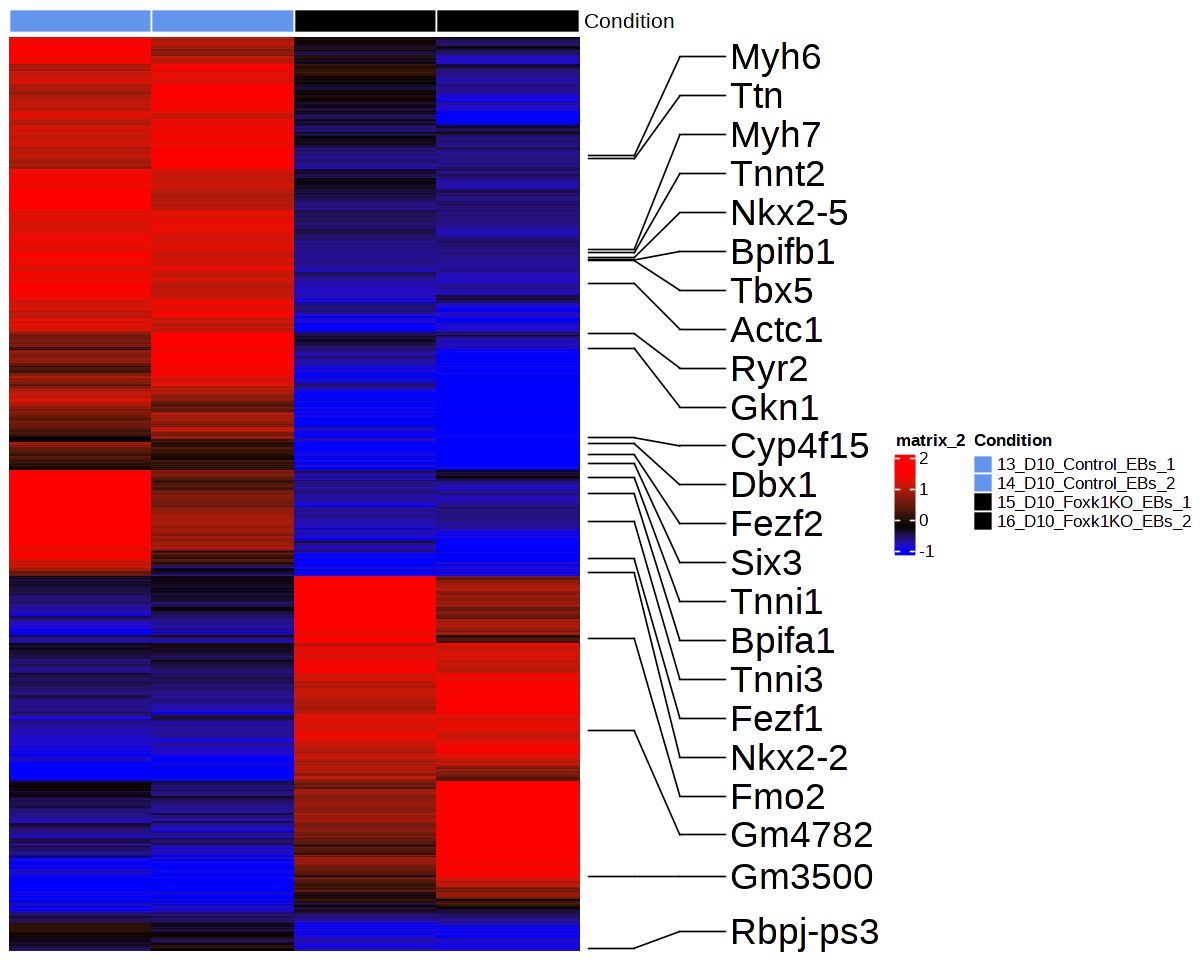

In [ ]:
column_annotation <- HeatmapAnnotation(
  Condition = colnames(control_mat),
  col = list(Condition = c("13_D10_Control_EBs_1" = "cornflowerblue", "14_D10_Control_EBs_2" = "cornflowerblue",  "15_D10_Foxk1KO_EBs_1" = "black", "16_D10_Foxk1KO_EBs_2" = "black")),
  gp = gpar(col = "white")
)

col_fun <- colorRamp2(quantile(control_mat, c(0.1, 0.5, 0.9)), c("blue", "black", "red"))

options(repr.plot.width=10, repr.plot.height = 8)
Heatmap(
  control_mat,
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  top_annotation = column_annotation,
  show_row_names = FALSE,
  show_column_names = FALSE,
  show_column_dend = FALSE,
  col = col_fun,
  show_row_dend = FALSE,
  row_names_gp = gpar(fontsize = 15)) +
  rowAnnotation(
    mark = anno_mark(
      at = which(rownames(control_mat) %in% term), 
      labels = rownames(control_mat)[rownames(control_mat) %in% term], 
      labels_gp = gpar(fontsize = 22), 
      link_width = unit(30, "mm"),
      padding = unit(1.5, "mm"), 
      which = 'row'
    ) 
  )

#Pathway analysis for Control vs Foxk1 Null

In [ ]:
up_wt <- sig[sig$log2FoldChange > 0,]$gene_name

In [ ]:
up_ko <- sig[sig$log2FoldChange < 0,]$gene_name

In [ ]:
go <- enrichGO(gene = up_wt,
                OrgDb         = org.Mm.eg.db,
                keyType = 'SYMBOL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
        readable      = FALSE)

In [ ]:
enrich_go <- go %>% filter(str_detect(Description, 'pathway|cascade|development|regeneration')) %>% filter(!str_detect(Description, 'Wnt|Notch|negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



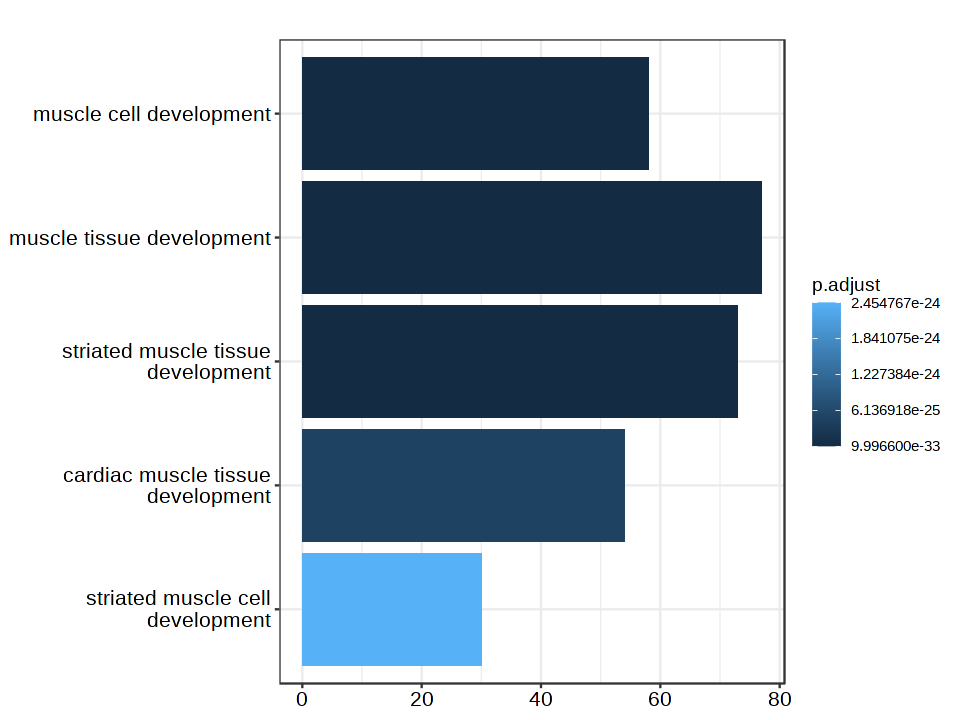

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
barplot(enrich_go, showCategory=5)  + scale_fill_gradient(low = "#132B43", high = "#56B1F7")

In [ ]:
ko <- enrichGO(gene = up_ko,
                OrgDb         = org.Mm.eg.db,
                keyType = 'SYMBOL',
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.05,
        readable      = FALSE)

In [ ]:
enrich_ko <- ko %>% filter(str_detect(Description, 'pathway|cascade|development|regeneration')) %>% filter(!str_detect(Description, 'Wnt|Notch|negative|positive')) ##subsetting data to keep terms that include pathway, cascade, development, regeneration and cardiac and excludes negative and positive

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



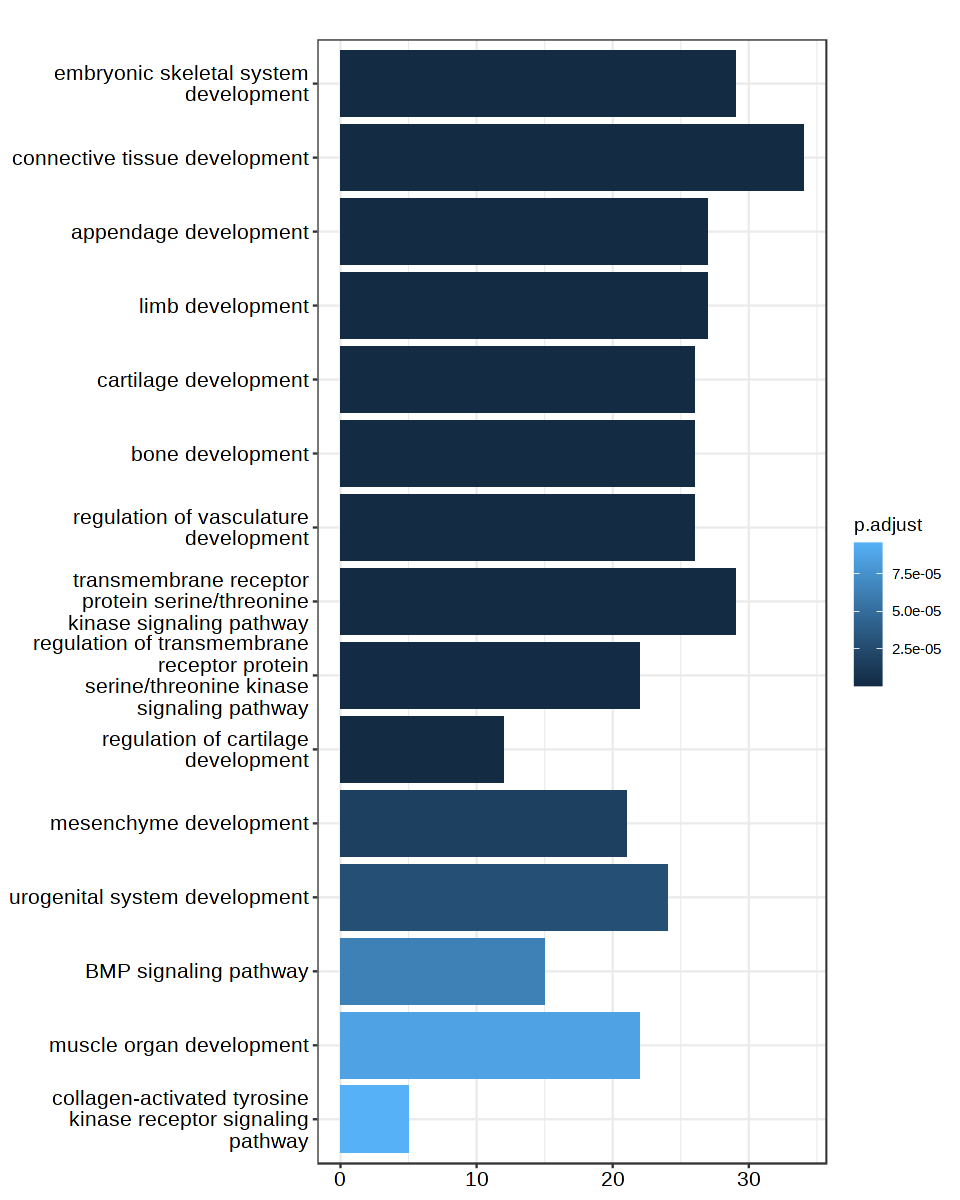

In [ ]:
options(repr.plot.width=8, repr.plot.height=10)
barplot(enrich_ko, showCategory=15)  + scale_fill_gradient(low = "#132B43", high = "#56B1F7")

In [ ]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] gageData_2.32.0             gage_2.44.0                
 [3] pathview_1.34.0             enrichplot_1.13.1.992      
 [5] GOSemSim_2.20.0             ggnewscale_0.4.7           
 [7] ReactomePA_1.38.0           DOSE_3.20.1                
 [